In [1]:
# import des packages nécessaires à l'exécution du code 

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Modèle 5 - Régression linéaire, avec valeurs extrêmes, uniquement variables qu'on peut demander à l'utilisateur

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. Les features sont : 
- les différentes surfaces (m2_living, m2_above,m2_basement,m2_lot)
- le nombre de pièces (bedrooms,bathrooms) et d'étages (floors)
- les années de construction, rénovation
- les notes obtenues sur différents sujets (grade,condition,view)
- localisation (zipcode, lat, long, waterfront)

J'ai retiré les features qu'il ne paraît pas logique de demander à un propriétaire, qu'il aurait du mal à connaître.

Preprocessing : 
- MinMaxScaler
- PolynomialFeature
- OneHotEncoder

In [3]:
df_model = pd.read_csv('data_cleaned.csv')

In [4]:
df_model.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2516.239882
3,2014-12-09,2487200875,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,3317.043210
4,2015-02-18,1954400510,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,3267.617069


In [10]:
X = df_model[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.drop(['view'],axis=1).select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode','view']

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('robust', RobustScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

regression = linear_model.LinearRegression()

pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

In [11]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
X_test.dtypes

m2_living       float64
grade             int64
view              int64
m2_above        float64
bathrooms       float64
zipcode           int64
m2_basement     float64
bedrooms          int64
waterfront        int64
floors          float64
yr_renovated      int64
m2_lot          float64
yr_built          int64
condition         int64
dtype: object

In [7]:
predictions = trained_pipe.predict(X_test)
print(predictions)
print(y_test)

[282256. 313976. 505784. ... 373712. 676864. 477688.]
8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
           ...   
8892     440000.0
14761    530000.0
14288    400000.0
7275     693000.0
20522    374500.0
Name: price, Length: 4322, dtype: float64


In [11]:
X_test.head()

,m2_living,grade,view,m2_above,bathrooms,zipcode,m2_basement,bedrooms,waterfront,floors,yr_renovated,m2_lot,yr_built,condition
8878,176.422797,7,0,176.422797,1.75,98198,0.00000,3,0,2.0,2005,1052.126475,1943,3
14851,164.438310,8,3,113.341660,1.00,98023,51.09665,2,0,1.0,0,1547.763980,1957,3
1564,167.225400,7,0,96.619120,1.00,98117,70.60628,3,0,1.0,0,534.192250,1947,3
4055,104.051360,7,0,71.535310,1.00,98126,32.51605,2,0,1.0,0,445.934400,1926,3
7526,124.490020,8,0,124.490020,2.00,98029,0.00000,2,0,2.0,0,151.896405,2003,3


In [12]:
y_test.head()

8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
Name: price, dtype: float64

In [13]:
data = {
    'bedrooms': [4],
    'bathrooms': [1.0],
    'm2_living': [197.91584],
    'm2_lot': [1052.370936],
    'floors': [2.0],
    'waterfront': [1],
    'view': [0],
    'condition': [3],
    'grade': [7],
    'm2_above': [178.91584],
    'yr_built': [1950],
    'zipcode': [98198],
    'm2_basement': [0],
    'yr_renovated': [2005]
}

X_test = pd.DataFrame(data)

y_pred = pipe.predict(X_test)
print(y_pred)

[-1.23801813e+09]


In [12]:
trained_pipe.score(X_test, y_test)
print(predictions)
print(y_test)

[278103.83683963 356049.6217405  511993.8623897  ... 380013.24129856
 677725.49524233 503898.81630916]
8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
           ...   
8892     440000.0
14761    530000.0
14288    400000.0
7275     693000.0
20522    374500.0
Name: price, Length: 4322, dtype: float64


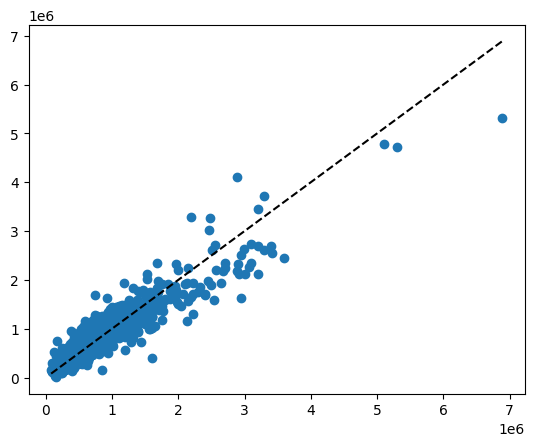

In [9]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')


## Sauvegarde avec pickle

In [10]:
with open('model.pickle','wb') as f: 
    pickle.dump(trained_pipe,f)

# Lasso

In [2]:
df_model = pd.read_csv('data_cleaned.csv')

In [14]:
X = df_model[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.drop(['view'],axis=1).select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode','view']

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('robust', RobustScaler())
])

catagorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'alpha':[0.1,1,10]} 

grid = GridSearchCV(Lasso(), param_grid, cv=5)

grid.fit(X_train, y_train)
regression = grid.best_estimator_


pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.519e+13, tolerance: 1.843e+11
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.437e+13, tolerance: 1.790e+11
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

In [15]:

trained_pipe = pipe.fit(X_train, y_train)
predictions = trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+14, tolerance: 2.255e+11
  model = cd_fast.enet_coordinate_descent(


0.8788393952319745

In [9]:
print(y_test)
print(predictions)

8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
           ...   
8892     440000.0
14761    530000.0
14288    400000.0
7275     693000.0
20522    374500.0
Name: price, Length: 4322, dtype: float64
[278103.83683963 356049.6217405  511993.8623897  ... 380013.24129856
 677725.49524233 503898.81630916]


In [6]:
data = {
    'bedrooms': [4],
    'bathrooms': [1.0],
    'm2_living': [197.91584],
    'm2_lot': [1052.370936],
    'floors': [2.0],
    'waterfront': [1],
    'view': [0],
    'condition': [3],
    'grade': [7],
    'm2_above': [178.91584],
    'yr_built': [1950],
    'zipcode': [98198],
    'm2_basement': [0],
    'yr_renovated': [2005]
}

X_test = pd.DataFrame(data)

y_pred = pipe.predict(X_test)
print(y_pred)

[516589.88313091]


In [43]:
## Sauvegarde avec pickle
with open('model.pickle2','wb') as f: 
    pickle.dump(trained_pipe,f)